# Modelling with Treated Data

After selecting the specific subset of data to work with for my experiments, I test the features here on a suite of models.

The best performing model was the Random Forest Classifier so I move forwards with that one.

### Imports and loading data

In [2]:
import pandas as pd
import xgboost as xgb
from metrics import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import KFold, StratifiedKFold

In [13]:
# multiomics_clean = pd.read_csv("../data_csv/multiomics_svd_biplot_1_3_21.csv")
# multiomics_clean = pd.read_csv("../data_csv/multiomics_svd_10x100.csv")
multiomics_clean = pd.read_csv("../data_csv/multiomics_auc_dist_1000.csv")
# multiomics_clean = pd.read_csv("../data_csv/multiomics_best_slides.csv")


target_tags = pd.Index(['2D10-LTR5', '2D10-Tat', '2D10-Vpu', '2D10-Env', '2D10-d2EGFP',
       '2D10-LTR3', 'Target'])
other_columns = multiomics_clean.columns.drop(target_tags).drop(pd.Index(["dataset"]))

pd_train = multiomics_clean.loc[multiomics_clean["dataset"] == "train"]
pd_test = multiomics_clean.loc[multiomics_clean["dataset"] == "test"]
pd_total = multiomics_clean

print(pd_total[other_columns].shape)

y_train = (pd_train["Target"].to_numpy() > 0).astype(int)
X_train = pd_train[other_columns].to_numpy()
y_test = (pd_test["Target"].to_numpy() > 0).astype(int)
X_test = pd_test[other_columns].to_numpy()


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train)

(3900, 1000)
(3121, 1000)
(3121,)
(779, 1000)
(779,)
[0 0 1 ... 0 0 0]


# XGBoost (failed but put here for basic results)

In [3]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [ ]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic')
xg_clf.fit(X_train, y_train)

In [ ]:
y_hat = xg_clf.predict_proba(X_test)[:,1]
binary_metrics(y_test, y_hat, title="XGBoost, 100x100 SVD", binary=False)

In [ ]:
y_hat = xg_clf.predict(X_test)
binary_metrics(y_test, y_hat, title="XGBoost, 100x100 SVD", binary=True)

# Random Forest

As described in the project writeup, I run a random forest experiment with 5-fold cross-validation.

CLF Score: 0.9564102564102565
Metric: (zero one or MSE): 0.04366679487179487
CLF Score: 0.9551282051282052
Metric: (zero one or MSE): 0.046141794871794865
CLF Score: 0.9551282051282052
Metric: (zero one or MSE): 0.04518320512820512
CLF Score: 0.9564102564102565
Metric: (zero one or MSE): 0.04310307692307692
CLF Score: 0.9525641025641025
Metric: (zero one or MSE): 0.04560999999999999


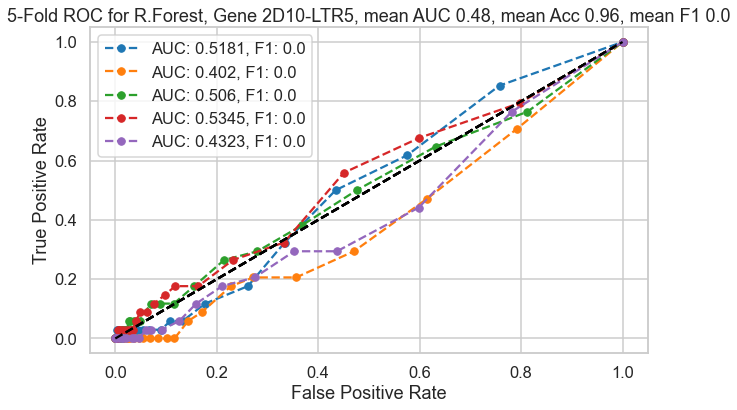

CLF Score: 0.7769230769230769
Metric: (zero one or MSE): 0.17489910256410257
CLF Score: 0.7692307692307693
Metric: (zero one or MSE): 0.18001064102564102
CLF Score: 0.7730769230769231
Metric: (zero one or MSE): 0.18554615384615383
CLF Score: 0.7705128205128206
Metric: (zero one or MSE): 0.1829724358974359
CLF Score: 0.7692307692307693
Metric: (zero one or MSE): 0.1852255128205128


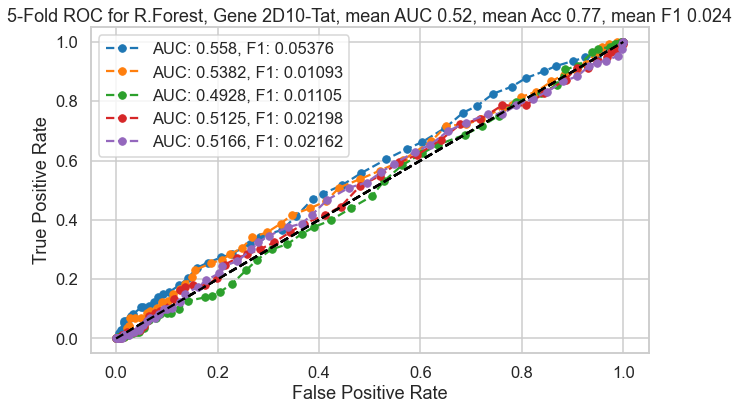

CLF Score: 0.9794871794871794
Metric: (zero one or MSE): 0.019319871794871796
CLF Score: 0.9794871794871794
Metric: (zero one or MSE): 0.020105641025641028
CLF Score: 0.9807692307692307
Metric: (zero one or MSE): 0.021422051282051283
CLF Score: 0.9807692307692307
Metric: (zero one or MSE): 0.019164743589743592
CLF Score: 0.9794871794871794
Metric: (zero one or MSE): 0.02075871794871795


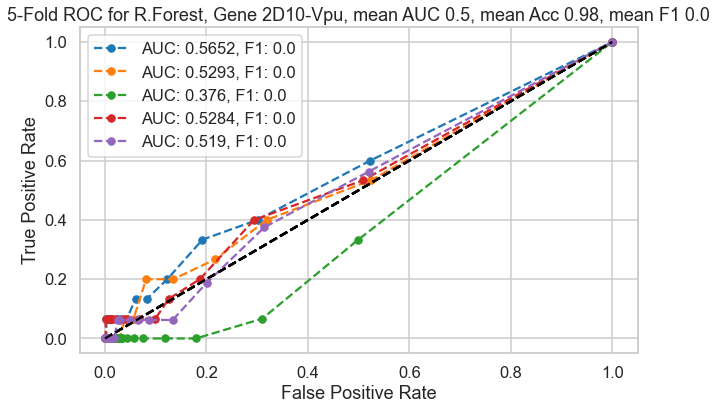

CLF Score: 0.8141025641025641
Metric: (zero one or MSE): 0.15241589743589742
CLF Score: 0.8064102564102564
Metric: (zero one or MSE): 0.1605773076923077
CLF Score: 0.8141025641025641
Metric: (zero one or MSE): 0.15724858974358974
CLF Score: 0.8115384615384615
Metric: (zero one or MSE): 0.16569820512820513
CLF Score: 0.8115384615384615
Metric: (zero one or MSE): 0.16479935897435896


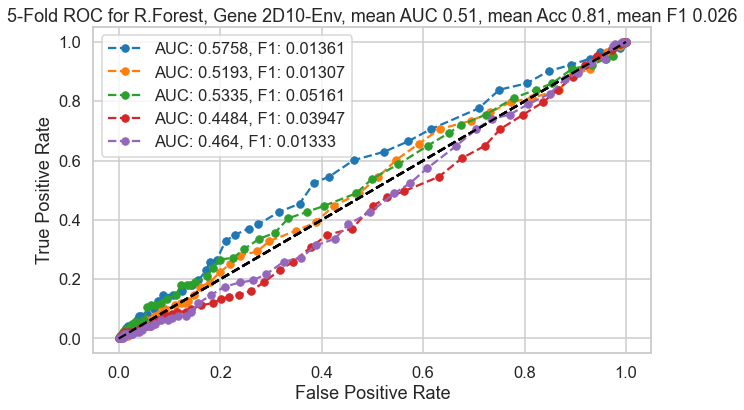

CLF Score: 0.9564102564102565
Metric: (zero one or MSE): 0.04322474358974359
CLF Score: 0.9538461538461539
Metric: (zero one or MSE): 0.04576987179487179
CLF Score: 0.9538461538461539
Metric: (zero one or MSE): 0.04476961538461538
CLF Score: 0.9564102564102565
Metric: (zero one or MSE): 0.043695769230769226
CLF Score: 0.9564102564102565
Metric: (zero one or MSE): 0.04360743589743589


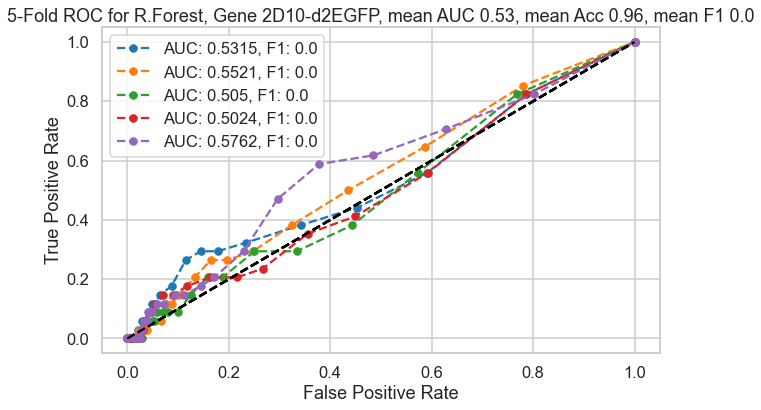

CLF Score: 0.7115384615384616
Metric: (zero one or MSE): 0.20781282051282052
CLF Score: 0.7038461538461539
Metric: (zero one or MSE): 0.21868435897435898
CLF Score: 0.6961538461538461
Metric: (zero one or MSE): 0.22022423076923078
CLF Score: 0.7141025641025641
Metric: (zero one or MSE): 0.2132358974358974
CLF Score: 0.7012820512820512
Metric: (zero one or MSE): 0.21512038461538463


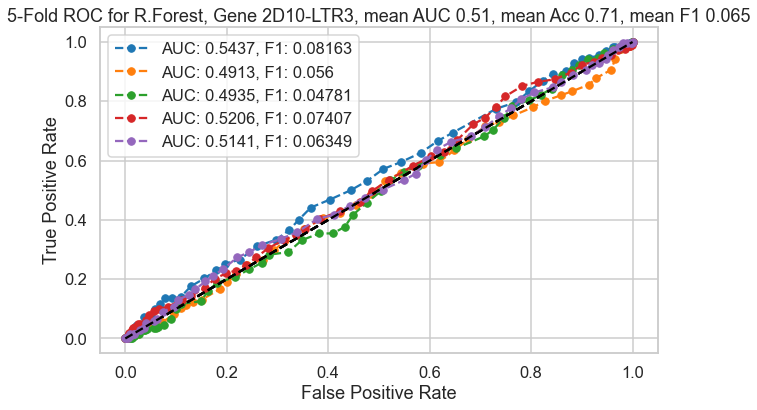

CLF Score: 0.5923076923076923
Metric: (zero one or MSE): 0.2437933333333333
CLF Score: 0.5858974358974359
Metric: (zero one or MSE): 0.25114128205128206
CLF Score: 0.5858974358974359
Metric: (zero one or MSE): 0.25132628205128205
CLF Score: 0.5884615384615385
Metric: (zero one or MSE): 0.24486564102564104
CLF Score: 0.5743589743589743
Metric: (zero one or MSE): 0.2529494871794871


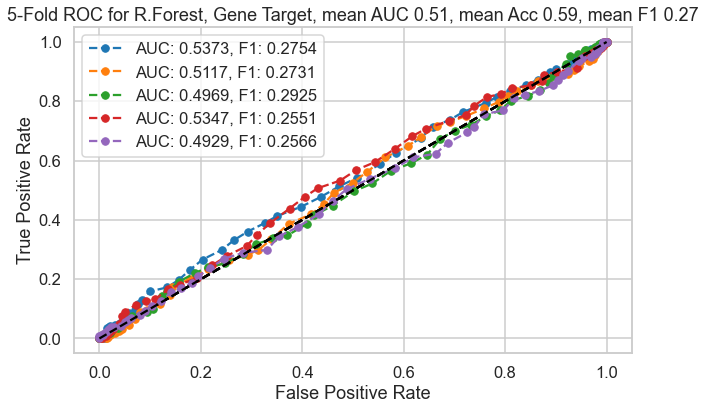

In [14]:
kf = StratifiedKFold(n_splits = 5)

# Loop through 6 HIV genes and the summed target
for target_tag in target_tags:
    X = pd_total[other_columns].to_numpy()
    y = (pd_total[target_tag].to_numpy() > 0).astype(int)
    
    aucs = []
    accs = []
    f1s = []
    aucmax = 0.0
    best_probs = np.array([])
    best_test = np.array([])
    plt.figure(figsize=(10,6))
    
    # 5-fold CV
    for splitno, indices in enumerate(kf.split(X, y)):
        train_index, test_index = indices
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        # Train a RFC
        clf = RandomForestClassifier(bootstrap=False, verbose=False) #max_depth=16, n_estimators=400, 
        clf.fit(X_train, y_train)
        print("CLF Score: {}".format(clf.score(X_test, y_test)))
        accs.append(clf.score(X_test, y_test))
        y_probs = clf.predict_proba(X_test)
        y_preds = clf.predict(X_test)
    
        # Generate metrics
        auc, f1 = binary_metrics(y_test, y_probs[:, 1], binary=False, title="R.Forest, Gene {}, Split {}".format(target_tag, splitno))
        f1s.append(f1)
        aucs.append(auc)
        if np.absolute(auc-0.5) > aucmax:
            best_probs = y_probs[:, 1]
            best_test = y_test
            aucmax = np.absolute(auc-0.5)
    plt.title("5-Fold ROC for R.Forest, Gene {}, mean AUC {:0.2}, mean Acc {:0.2}, mean F1 {:0.2}".format(target_tag, np.mean(aucs), np.mean(accs), np.mean(f1s)))
    plt.legend()
    plt.show()
#     print("AUC mean: {}".format(np.mean(aucs)))
#     binary_metrics(best_test, best_probs, binary=False,  title="R.Forest, Gene {}".format(target_tag))